In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from pygmo import *
from mpl_toolkits.mplot3d import Axes3D
import methods_updated as mt
%matplotlib inline

In [13]:
def read_execution_times(file_path):
    file = open(file_path, 'r')
    file_lines = file.readlines()
    
    return [int(time) for time in file_lines]

def plot_hypervolume_convergence(file_path, folder, file, dimension, reference_point=None, plot=True):
    number_of_executions = 21
    file_path = file_path
    hv_df = pd.DataFrame()

    for i in range(number_of_executions):
        file_name = file + str(i) + '.txt'

        f = open(os.path.join(file_path, folder, file_name),'r',encoding='utf-8')
        print(os.path.join(file_path, folder, file_name))
        data = f.readlines()
        splitted_data = ' '.join([i for i in data]).split('#\n')
        splitted_data = [i for i in splitted_data if len(i) > 1]

        hv_pareto = []
        indexes = []
        for k in range(len(splitted_data)):
            converted = [i.strip().split(',') for i in splitted_data[k].split('\n') if len(i) > 1]
            pop = [[float(j) for j in i] for i in converted]
            hv = hypervolume(pop)
            if reference_point is None:
                hv_pareto.append(hv.compute([200000,150000,150000,150000,150000,150000,150000,1]))
            else:
                hv_pareto.append(hv.compute(reference_point))
            indexes.append(100*k)
        df = pd.DataFrame(data=[indexes, hv_pareto]).T
        columns_string = 'Evaluation HV'+str(i)
        df.columns = columns_string.split()
        hv_df = pd.concat([hv_df, df[columns_string.split()[1]]], axis=1, sort=False)
    if plot:
    	hv_df.T.mean().plot(x='Evaluation', y='HV',figsize=(10,8))
    return hv_df.T.mean(), hv_df

def random_test(df1, df2, number_of_samples=30, plot_hist = True, bins=60, name=None):
    DORAND = 5000
    
    spread2 = df2.values
    spread1 = df1.values
    
    medianSpreadDiff = np.median(spread2) - np.median(spread1)
    meanSpreadDiff = np.mean(spread2) - np.mean(spread1)
    
    totalSpread = np.append(spread1.tolist(), spread2.tolist())
    
    randMedianSpreadDiff = np.nan * np.ones((DORAND,1))
    randMeanSpreadDiff = np.nan * np.ones((DORAND,1))
    
    for randPool in range(0, DORAND-1):
        new1Index = np.random.permutation(number_of_samples)
        newSpread1 = totalSpread[new1Index[0:int(number_of_samples/2)]]
        newSpread2 = totalSpread[new1Index[int(number_of_samples/2):number_of_samples]]
        
        randMedianSpreadDiff[randPool] = np.median(newSpread2) - np.median(newSpread1)
        randMeanSpreadDiff[randPool] = np.mean(newSpread2) - np.mean(newSpread1)
        
    randMedianSpreadDiff[DORAND - 1] = medianSpreadDiff
    randMeanSpreadDiff[DORAND - 1] = meanSpreadDiff
    
    z = (meanSpreadDiff - np.mean(randMeanSpreadDiff) )/ np.std(randMeanSpreadDiff)
        
    limiar = 1.96 * np.std(randMeanSpreadDiff) + np.mean(randMeanSpreadDiff)
    
    if z <= -1.96:
        print('H1-')
    elif z >= 1.96:
        print('H1+')
    else:
        print('H0')
    print('Limiar =',limiar)
    print('z =',z)
    print('Mean Spread Diff',meanSpreadDiff)
    if plot_hist:
        plt.figure(figsize=(9,6))
        plt.hist(randMeanSpreadDiff, bins=bins, color='gray', label='Distribution')
        plt.plot([meanSpreadDiff], [0], color='black', marker='x', markersize=12, clip_on=False)
        plt.plot([limiar], [0], color='black', marker='o', markersize=12, clip_on=False)
        plt.plot([-limiar], [0], color='black', marker='o', markersize=12, clip_on=False)
        plt.scatter(x=meanSpreadDiff, y=0, color='black', marker='x', s=100, label='Observed Mean Difference')
        plt.scatter(x=limiar, y=0, color='black', s=100, label='Confidence Limiars (95%)')
        plt.xticks(fontsize=(15))
        plt.yticks(fontsize=(15))
        plt.legend(fontsize = 'large')
        if name is not None:
            fig = plt.gcf()
            plt.show()
            fig.savefig(name, format=name.split('.')[1])
        else:
            plt.show()

In [4]:
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
instance = 'r050n12tw10k4'

# OnCl$\tau$-MOEA/D

/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL/r050n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-0.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL/r050n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-1.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL/r050n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-2.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL/r050n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-3.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL/r050n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-4.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL/r050n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-5.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL/r050n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-6.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/

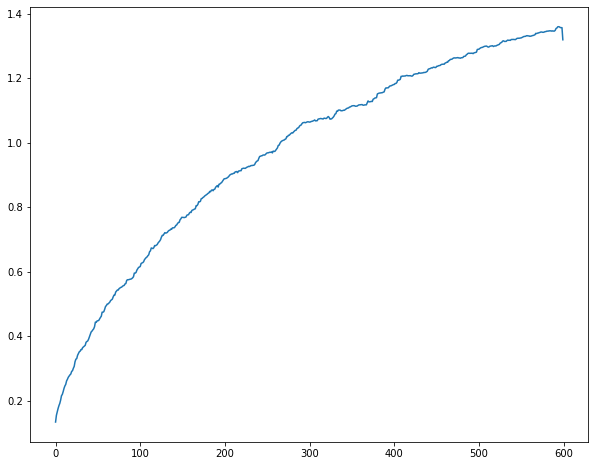

In [5]:
file = 'onmoead_kendall-original-pareto-normalized-execution-'
time_file = 'onmoead_kendall-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'ONMOEAD_KENDALL'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
algorithm_name_1 = r'OnCL$\tau$-MOEA/D'
times_1 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_kendall_r050, hv_moead_kendall_r050_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=True)

# OnCl$\rho$-MOEA/D

/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON/r050n12tw10k4/onmoead_pearson-original-pareto-normalized-execution-0.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON/r050n12tw10k4/onmoead_pearson-original-pareto-normalized-execution-1.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON/r050n12tw10k4/onmoead_pearson-original-pareto-normalized-execution-2.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON/r050n12tw10k4/onmoead_pearson-original-pareto-normalized-execution-3.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON/r050n12tw10k4/onmoead_pearson-original-pareto-normalized-execution-4.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON/r050n12tw10k4/onmoead_pearson-original-pareto-normalized-execution-5.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON/r050n12tw10k4/onmoead_pearson-original-pareto-normalized-execution-6.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/

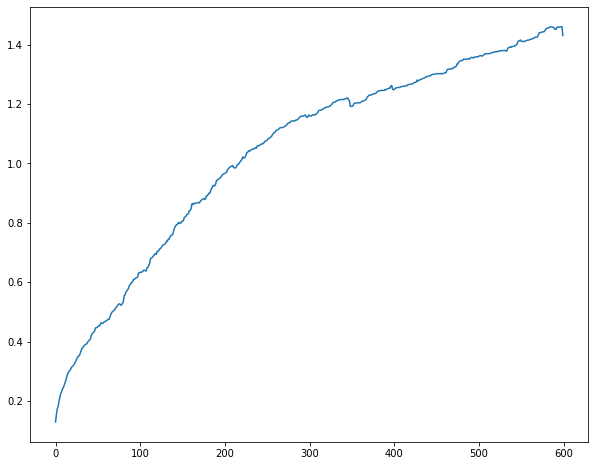

In [6]:
file = 'onmoead_pearson-original-pareto-normalized-execution-'
time_file = 'onmoead_pearson-execution_times.csv'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'ONMOEAD_PEARSON'
algorithm_name_4 = r'OnCL$\rho$-MOEA/D'
times_4 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_pearson_r050, hv_moead_pearson_r050_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=True)

# Off-MOEA/D

/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2/r050n12tw10k4/moead_r2-original-pareto-normalized-execution-0.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2/r050n12tw10k4/moead_r2-original-pareto-normalized-execution-1.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2/r050n12tw10k4/moead_r2-original-pareto-normalized-execution-2.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2/r050n12tw10k4/moead_r2-original-pareto-normalized-execution-3.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2/r050n12tw10k4/moead_r2-original-pareto-normalized-execution-4.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2/r050n12tw10k4/moead_r2-original-pareto-normalized-execution-5.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2/r050n12tw10k4/moead_r2-original-pareto-normalized-execution-6.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2/r050n12tw10k4/moead_r2-original-pareto-normalized-execution-7.txt
/home/renansanto

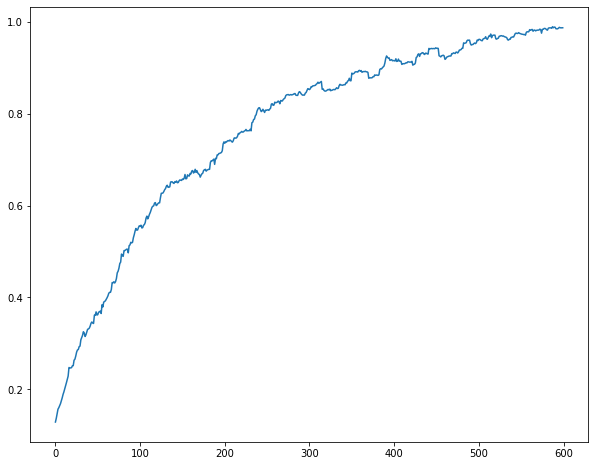

In [7]:
file = 'moead_r2-original-pareto-normalized-execution-'
time_file = 'moead_r2-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'MOEAD_R2'
algorithm_name_2 = 'Off-MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2'
times_2 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r2_r050, hv_moead_r2_r050_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=True)

# MOEA/D

/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8/r050n12tw10k4/moead_r8-original-pareto-normalized-execution-0.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8/r050n12tw10k4/moead_r8-original-pareto-normalized-execution-1.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8/r050n12tw10k4/moead_r8-original-pareto-normalized-execution-2.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8/r050n12tw10k4/moead_r8-original-pareto-normalized-execution-3.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8/r050n12tw10k4/moead_r8-original-pareto-normalized-execution-4.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8/r050n12tw10k4/moead_r8-original-pareto-normalized-execution-5.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8/r050n12tw10k4/moead_r8-original-pareto-normalized-execution-6.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8/r050n12tw10k4/moead_r8-original-pareto-normalized-execution-7.txt
/home/renansanto

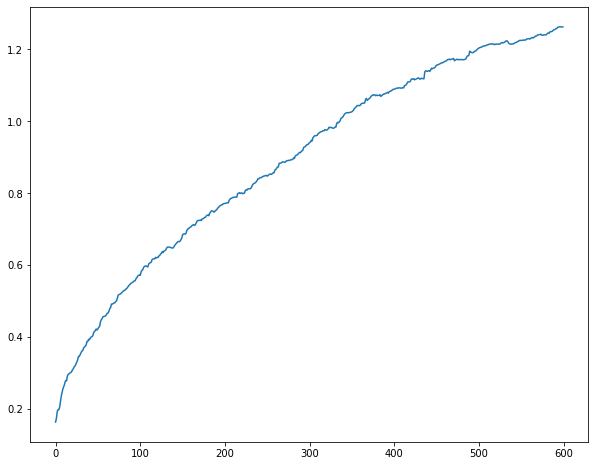

In [8]:
file = 'moead_r8-original-pareto-normalized-execution-'
time_file = 'moead_r8-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.15, 1.1, 1.1, 1.13, 1.1]
algorithm_folder = 'MOEAD_R8'
algorithm_name_3 = 'MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8'
times_3 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r8_r050, hv_moead_r8_r050_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=True)

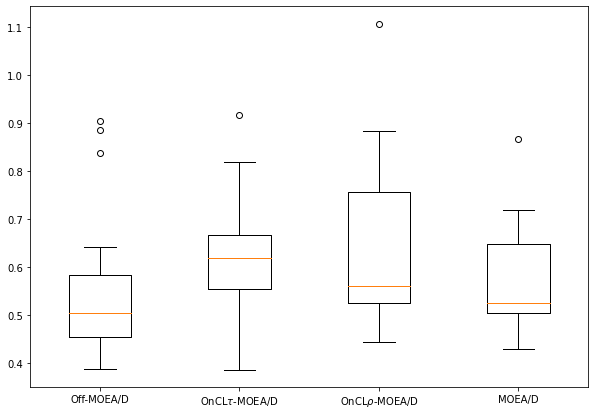

In [9]:
data_to_plot = [hv_moead_r2_r050_df.iloc[99:].values.tolist()[0],
                hv_moead_kendall_r050_df.iloc[99:].values.tolist()[0],
                hv_moead_pearson_r050_df.iloc[99:].values.tolist()[0],
                hv_moead_r8_r050_df.iloc[99:].values.tolist()[0],              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_2,
                                  algorithm_name_1,
                                  algorithm_name_4,
                                  algorithm_name_3,
                                  ])
plt.show()

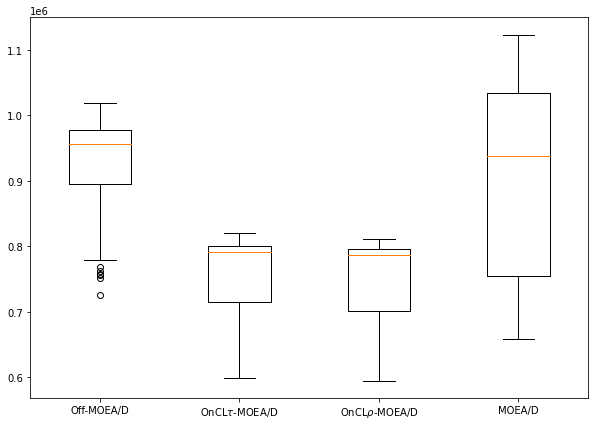

In [10]:
data_to_plot = [times_2,
                times_1,
                times_4,
                times_3,              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_2,
                                  algorithm_name_1,
                                  algorithm_name_4,
                                  algorithm_name_3,
                                  ])
plt.show()

H1+
Limiar = 0.20003726647295564
z = 2.9053644814771897
Mean Spread Diff 0.29681613230898896


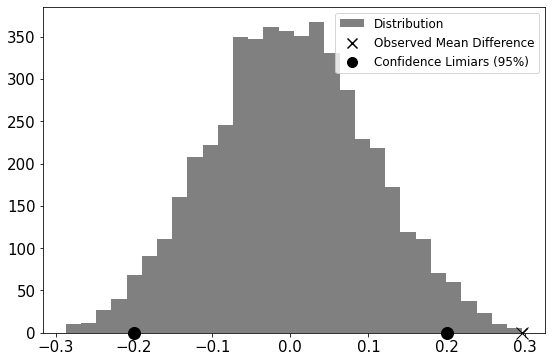

CPU times: user 2.18 s, sys: 116 ms, total: 2.3 s
Wall time: 2.16 s


In [16]:
%%time
random_test(hv_moead_r2_r050_df.iloc[300:],
               hv_moead_kendall_r050_df.iloc[300:],
               21,
               True,
               bins=30,
               name='off_kendall_r050.pdf')

H1+
Limiar = 0.2014897941675171
z = 3.7004247100352603
Mean Spread Diff 0.3801064078239057


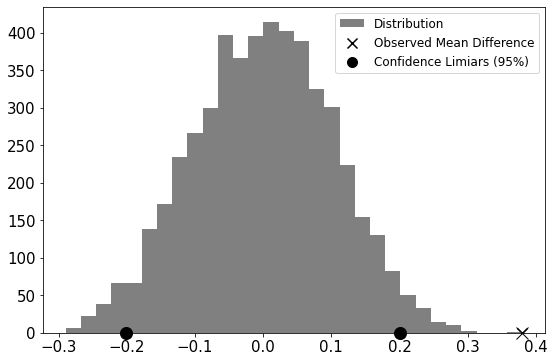

CPU times: user 2.25 s, sys: 157 ms, total: 2.41 s
Wall time: 2.16 s


In [17]:
%%time
random_test(hv_moead_r2_r050_df.iloc[300:],
               hv_moead_pearson_r050_df.iloc[300:],
               21,
               True,
               bins=30,
               name='off_pearson_r050.pdf')

H1+
Limiar = 0.20027526868073953
z = 2.013161712654355
Mean Spread Diff 0.20569933970267484


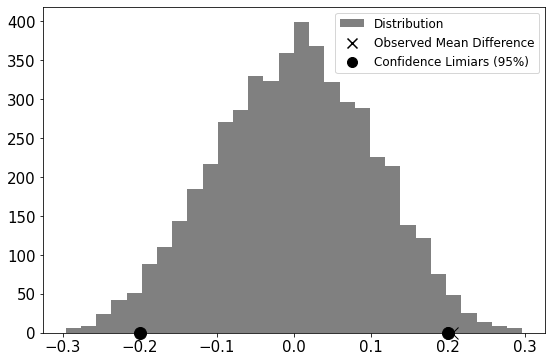

CPU times: user 2.02 s, sys: 165 ms, total: 2.18 s
Wall time: 1.93 s


In [18]:
%%time
random_test(hv_moead_r2_r050_df.iloc[300:],
               hv_moead_r8_r050_df.iloc[300:],
               21,
               True,
               bins=30,
               name='off_moead_r050.pdf')

H0
Limiar = 0.23116785960190572
z = 0.7927769073161072
Mean Spread Diff 0.09111679260631411


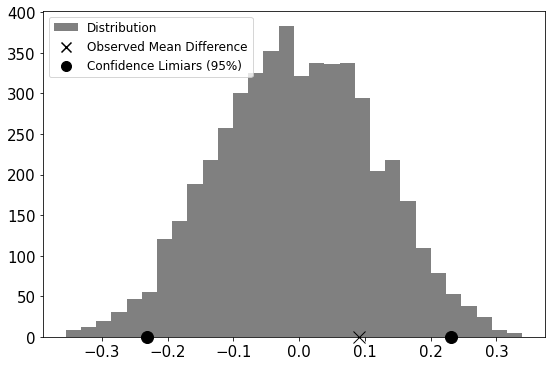

CPU times: user 2.23 s, sys: 156 ms, total: 2.38 s
Wall time: 2.16 s


In [21]:
%%time
random_test(hv_moead_r8_r050_df.iloc[300:],
               hv_moead_kendall_r050_df.iloc[300:],
               21,
               True,
               bins=30,
               name='moead_kendall_r050.pdf')

H0
Limiar = 0.23319497203557718
z = 1.4660937252629644
Mean Spread Diff 0.17440706812123086


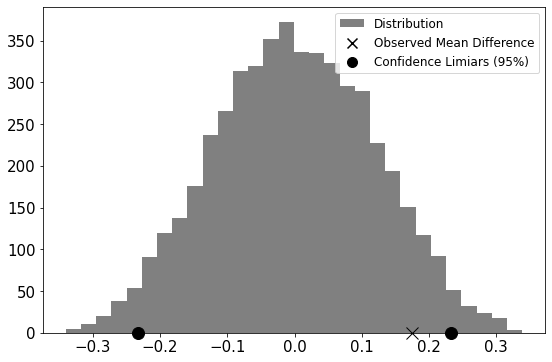

CPU times: user 2.07 s, sys: 168 ms, total: 2.24 s
Wall time: 1.97 s


In [22]:
%%time
random_test(hv_moead_r8_r050_df.iloc[300:],
               hv_moead_pearson_r050_df.iloc[300:],
               21,
               True,
               bins=30,
               name='moead_pearson_r050.pdf')

In [23]:
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
instance = 'r100n12tw10k4'

# OnCl$\tau$-MOEA/D

/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL/r100n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-0.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL/r100n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-1.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL/r100n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-2.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL/r100n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-3.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL/r100n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-4.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL/r100n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-5.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL/r100n12tw10k4/onmoead_kendall-original-pareto-normalized-execution-6.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/

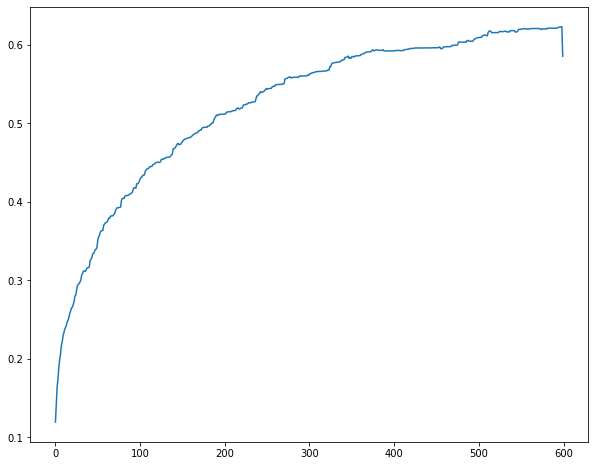

In [24]:
file = 'onmoead_kendall-original-pareto-normalized-execution-'
time_file = 'onmoead_kendall-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'ONMOEAD_KENDALL'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_KENDALL'
algorithm_name_1 = r'OnCL$\tau$-MOEA/D'
times_1 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_kendall_r050, hv_moead_kendall_r050_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=True)

# OnCl$\rho$-MOEA/D

/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON/r100n12tw10k4/onmoead_pearson-original-pareto-normalized-execution-0.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON/r100n12tw10k4/onmoead_pearson-original-pareto-normalized-execution-1.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON/r100n12tw10k4/onmoead_pearson-original-pareto-normalized-execution-2.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON/r100n12tw10k4/onmoead_pearson-original-pareto-normalized-execution-3.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON/r100n12tw10k4/onmoead_pearson-original-pareto-normalized-execution-4.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON/r100n12tw10k4/onmoead_pearson-original-pareto-normalized-execution-5.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON/r100n12tw10k4/onmoead_pearson-original-pareto-normalized-execution-6.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/

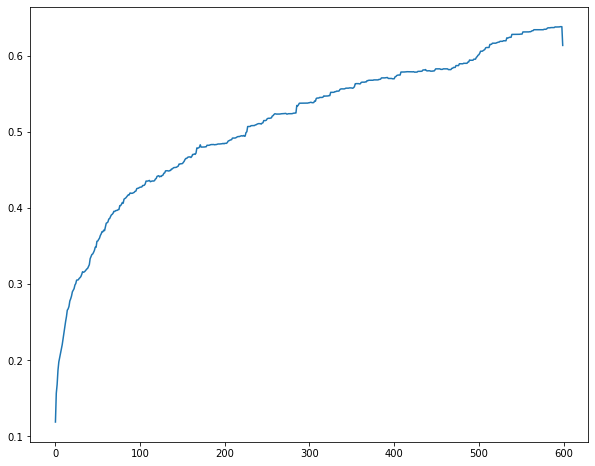

In [25]:
file = 'onmoead_pearson-original-pareto-normalized-execution-'
time_file = 'onmoead_pearson-execution_times.csv'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/ONLINE_PEARSON'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'ONMOEAD_PEARSON'
algorithm_name_4 = r'OnCL$\rho$-MOEA/D'
times_4 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_pearson_r050, hv_moead_pearson_r050_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=True)

# Off-MOEA/D

/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2/r100n12tw10k4/moead_r2-original-pareto-normalized-execution-0.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2/r100n12tw10k4/moead_r2-original-pareto-normalized-execution-1.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2/r100n12tw10k4/moead_r2-original-pareto-normalized-execution-2.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2/r100n12tw10k4/moead_r2-original-pareto-normalized-execution-3.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2/r100n12tw10k4/moead_r2-original-pareto-normalized-execution-4.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2/r100n12tw10k4/moead_r2-original-pareto-normalized-execution-5.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2/r100n12tw10k4/moead_r2-original-pareto-normalized-execution-6.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2/r100n12tw10k4/moead_r2-original-pareto-normalized-execution-7.txt
/home/renansanto

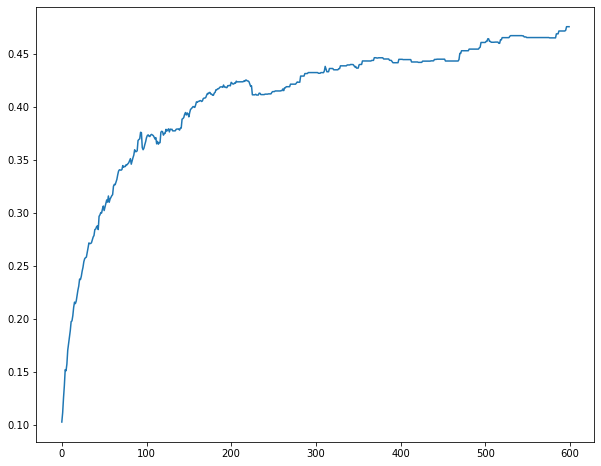

In [26]:
file = 'moead_r2-original-pareto-normalized-execution-'
time_file = 'moead_r2-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.1, 1.15, 1.1, 1.13, 1.1]
algorithm_folder = 'MOEAD_R2'
algorithm_name_2 = 'Off-MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R2'
times_2 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r2_r050, hv_moead_r2_r050_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=True)

# MOEA/D

/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8/r100n12tw10k4/moead_r8-original-pareto-normalized-execution-0.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8/r100n12tw10k4/moead_r8-original-pareto-normalized-execution-1.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8/r100n12tw10k4/moead_r8-original-pareto-normalized-execution-2.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8/r100n12tw10k4/moead_r8-original-pareto-normalized-execution-3.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8/r100n12tw10k4/moead_r8-original-pareto-normalized-execution-4.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8/r100n12tw10k4/moead_r8-original-pareto-normalized-execution-5.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8/r100n12tw10k4/moead_r8-original-pareto-normalized-execution-6.txt
/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8/r100n12tw10k4/moead_r8-original-pareto-normalized-execution-7.txt
/home/renansanto

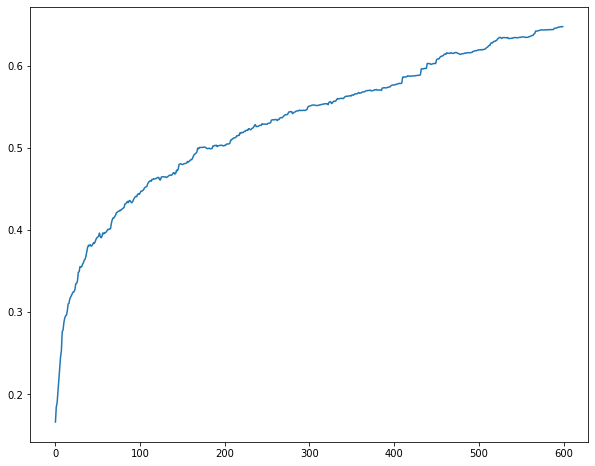

In [27]:
file = 'moead_r8-original-pareto-normalized-execution-'
time_file = 'moead_r8-execution_times.csv'
reference_point = [1.1, 1.1, 1.1, 1.15, 1.1, 1.1, 1.13, 1.1]
algorithm_folder = 'MOEAD_R8'
algorithm_name_3 = 'MOEA/D'
current_test = '/home/renansantos/Área de Trabalho/Deb/deb_test/MOEAD_R8'
times_3 = read_execution_times(os.path.join('Results_2020', current_test , instance, time_file))
hv_moead_r8_r050, hv_moead_r8_r050_df = plot_hypervolume_convergence(
    os.path.join('Results_2020', current_test , instance),
    folder='',
    file=file,
    reference_point=reference_point,
    dimension=8,
    plot=True)

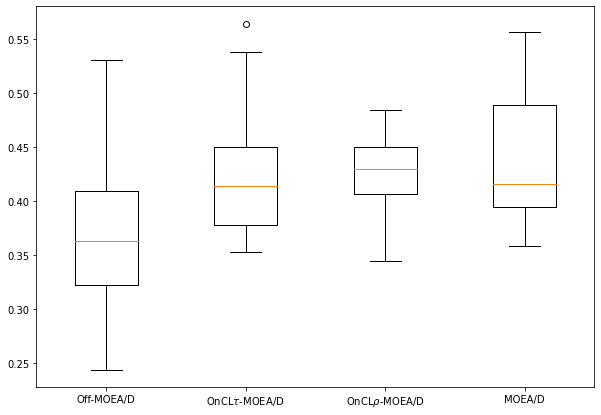

In [28]:
data_to_plot = [hv_moead_r2_r050_df.iloc[99:].values.tolist()[0],
                hv_moead_kendall_r050_df.iloc[99:].values.tolist()[0],
                hv_moead_pearson_r050_df.iloc[99:].values.tolist()[0],
                hv_moead_r8_r050_df.iloc[99:].values.tolist()[0],              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_2,
                                  algorithm_name_1,
                                  algorithm_name_4,
                                  algorithm_name_3,
                                  ])
plt.show()

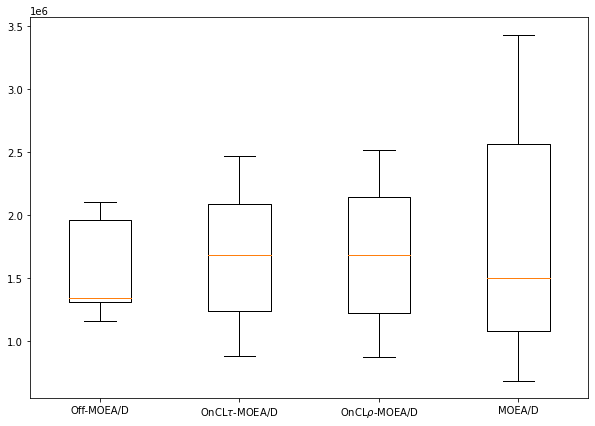

In [29]:
data_to_plot = [times_2,
                times_1,
                times_4,
                times_3,              
               ]
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=[algorithm_name_2,
                                  algorithm_name_1,
                                  algorithm_name_4,
                                  algorithm_name_3,
                                  ])
plt.show()

H1+
Limiar = 0.06362362531307335
z = 4.572996404807505
Mean Spread Diff 0.148259880716909


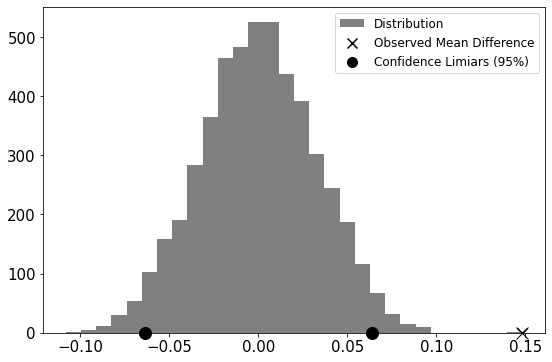

CPU times: user 1.95 s, sys: 160 ms, total: 2.11 s
Wall time: 1.84 s


In [30]:
%%time
random_test(hv_moead_r2_r050_df.iloc[300:],
               hv_moead_kendall_r050_df.iloc[300:],
               21,
               True,
               bins=30,
               name='off_kendall_r100.pdf')

H1+
Limiar = 0.06375095162681176
z = 4.248405100742918
Mean Spread Diff 0.13820660225386983


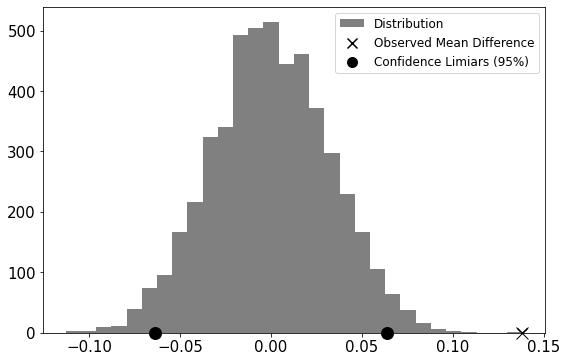

CPU times: user 1.97 s, sys: 140 ms, total: 2.11 s
Wall time: 1.85 s


In [31]:
%%time
random_test(hv_moead_r2_r050_df.iloc[300:],
               hv_moead_pearson_r050_df.iloc[300:],
               21,
               True,
               bins=30,
               name='off_pearson_r100.pdf')

H1+
Limiar = 0.06489305267372206
z = 4.516680399934082
Mean Spread Diff 0.14927135323212726


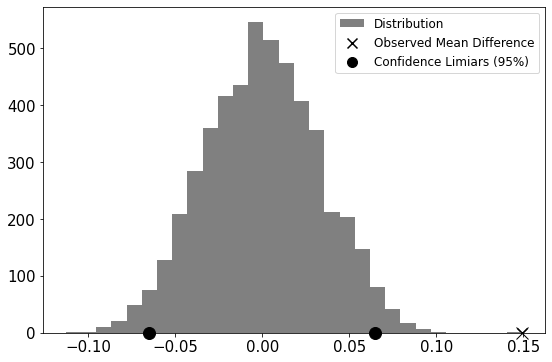

CPU times: user 2.18 s, sys: 144 ms, total: 2.32 s
Wall time: 2.07 s


In [32]:
%%time
random_test(hv_moead_r2_r050_df.iloc[300:],
               hv_moead_r8_r050_df.iloc[300:],
               21,
               True,
               bins=30,
               name='off_moead_r100.pdf')

H0
Limiar = 0.03975166536747609
z = -0.06616253953139493
Mean Spread Diff -0.0010114725152182702


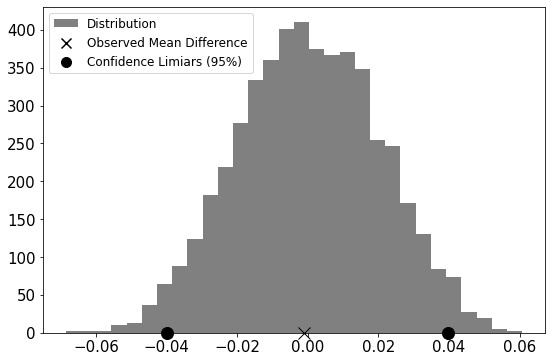

CPU times: user 2.05 s, sys: 152 ms, total: 2.2 s
Wall time: 1.94 s


In [33]:
%%time
random_test(hv_moead_r8_r050_df.iloc[300:],
               hv_moead_kendall_r050_df.iloc[300:],
               21,
               True,
               bins=30,
               name='moead_kendall_r100.pdf')

H0
Limiar = 0.03980626440138734
z = -0.5535949905987322
Mean Spread Diff -0.011064750978257432


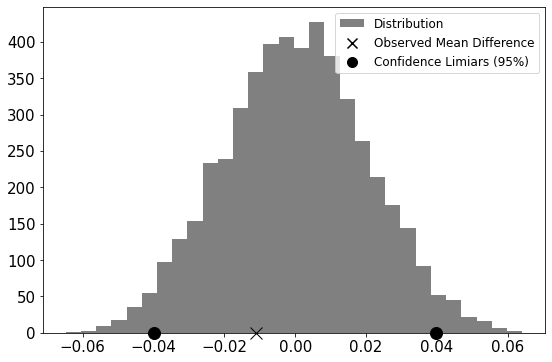

CPU times: user 1.97 s, sys: 112 ms, total: 2.08 s
Wall time: 1.97 s


In [34]:
%%time
random_test(hv_moead_r8_r050_df.iloc[300:],
               hv_moead_pearson_r050_df.iloc[300:],
               21,
               True,
               bins=30,
               name='moead_pearson_r100.pdf')